1. Merge games metadata from JSON file to games dataset to include the tags of the games in the games dataset. Find all the possible unique tags in the games metadata file and create a column for each of these tags. For each game, the column representing a particular tag will be labelled as 1 if the game has that tag and 0 if the game does not.
2. Remove rows where the final price of the game after discount is greater than the original price.
3. Perform ordinal encoding on the ‘ratings’ column to represent the ratings using integers. ‘rating _encoded’ can contain values 0 - 8 (0 being ‘Overwhelmingly Negative’ and 8 being ‘Overwhelmingly Positive’)
4. Update the values in the 'win', ‘mac’ and ’linux’ columns: True is replaced with 1, indicating that the game is supported on the particular platform, while False is substituted with 0, indicating that the game is not supported on the particular platform.
5. Apply a logarithmic transformation to the 'positive_ratio', ‘user_reviews’, ‘price_final’ and ‘price_original’ columns to create the 'positive_ratio_log', ‘user_reviews_log’, ‘price_final_log’ and ‘price_original_log’ features. This transformation aims to normalize the distribution of these features, making them more symmetric and suitable for certain statistical analyses and machine learning models.


The output should include the following columns:
'app_id': Unique identifier for the game

'title': Title of game

'data_released': Date of release of game on Steam

'win': Binary variable to indicate whether the game is available on Windows platform

'mac': Binary variable to indicate whether the game is available on macOS platform

'linux': Binary variable to indicate whether the game is available on Linux platform

'rating_encoded': Encoded rating of game on Steam

'positive_ratio_log': Natural logarithm of the ratio of positive feedback

'user_reviews_log': Natural logarithm of the number of user reviews

'price_final_log': Natural logarithm of the final price of the game

'price_original_log': Natural logarithm of the original price of the game

'discount': Highest ever discount rate of the game in percentage

'Cooking': Binary variable to indicate whether the game falls under the cooking tag

'Fighting': Binary variable to indicate whether the game falls under the fighting tag

The subsequent columns are binary variables that represent the genre of the games, similar to 'Cooking' and 'Fighting'

# EDA

In [1]:
!pip install pandas
!pip install matplotlib
!pip install sns
!pip install prince

  Preparing metadata (setup.py) ... done
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2639 sha256=d5e175fd9eb89fdb330c8f3b738d04f6d81dec732e6af2a2fef8948ca0d7ba11
  Stored in directory: /root/.cache/pip/wheels/76/1a/47/c3b6a8b9d3ae47b1488f4be13c86586327c07e0ac1bb5b3337
Successfully built sns
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 4.6 MB/s eta 0:00:00


In [10]:
import pandas as pd
# Check if price_final <= price_original
games_df = pd.read_csv('games.csv')

print("price_original is always greater than or equal to price_final:",(games_df['price_final'] <= games_df['price_original']).all())

price_original is always greater than or equal to price_final: False
Empty DataFrame
Columns: [app_id, title, date_release, win, mac, linux, rating, positive_ratio, user_reviews, price_final, price_original, discount, steam_deck]
Index: []
Number of rows with missing data: 0


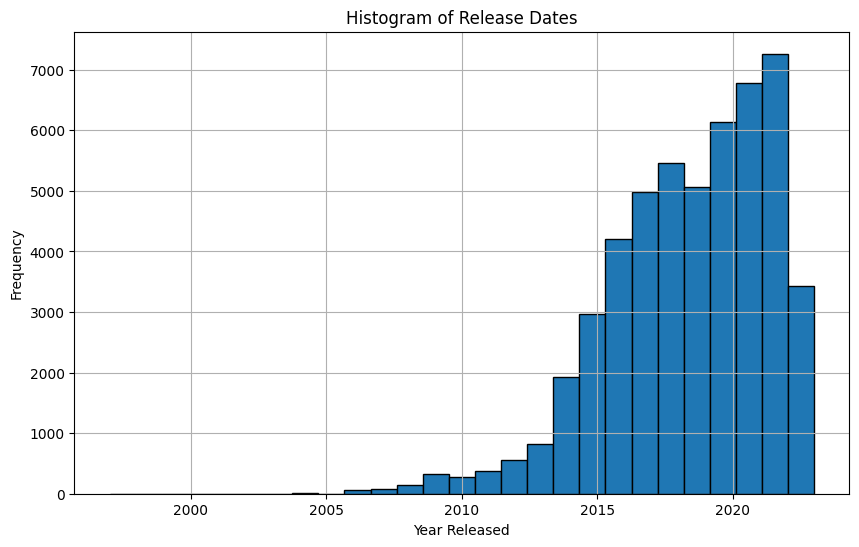

In [ ]:
import matplotlib.pyplot as plt

# Check date released
# Convert 'date_release' to datetime format if not already
games_df['date_release'] = pd.to_datetime(games_df['date_release'])

# Plotting the histogram for 'date_release'
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the figure
games_df['date_release'].dt.year.hist(bins=len(games_df['date_release'].dt.year.unique()), edgecolor='k')  # Histogram by year
plt.xlabel('Year Released')
plt.ylabel('Frequency')
plt.title('Histogram of Release Dates')
plt.show()

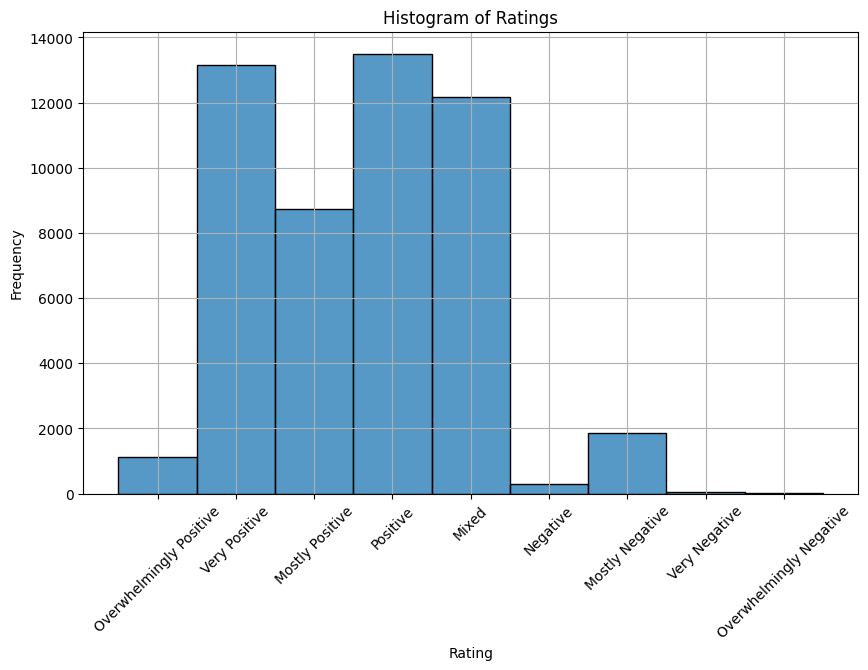

In [ ]:
import seaborn as sns
# Check rating column
# Define the desired order of categories
rating_order = [
    'Overwhelmingly Positive', 'Very Positive', 'Mostly Positive', 'Positive', 'Mixed',
    'Negative', 'Mostly Negative', 'Very Negative', 'Overwhelmingly Negative'
]

# Set the order of categories in the 'rating' column
games_df['rating'] = pd.Categorical(games_df['rating'], categories=rating_order, ordered=True)

# Plotting the histogram with the ordered categories
plt.figure(figsize=(10, 6))
sns.histplot(data=games_df, x='rating', bins=len(rating_order), edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

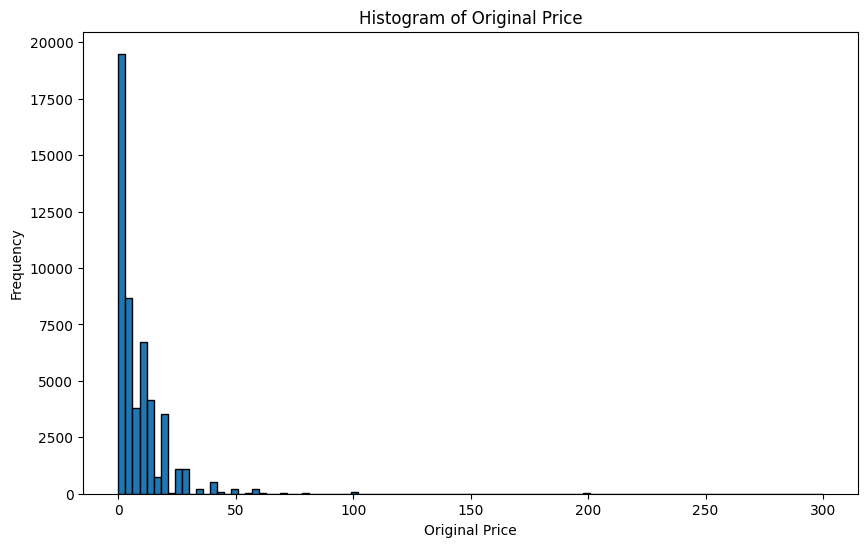

In [ ]:
# Check price_original
plt.figure(figsize=(10, 6))  # Optional: Sets the figure size
plt.hist(games_df['price_original'], bins=100, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Original Price')
plt.xlabel('Original Price')
plt.ylabel('Frequency')
plt.show()

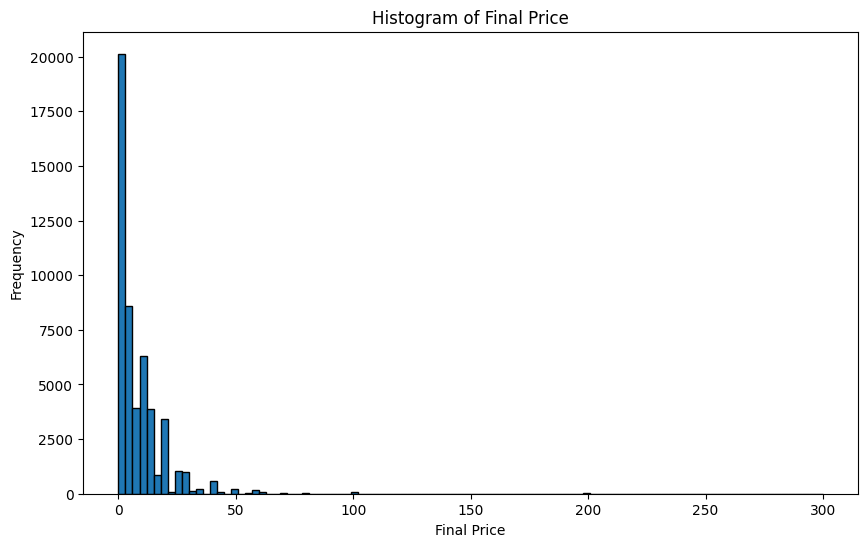

In [ ]:
# Check price_final
plt.figure(figsize=(10, 6))  # Optional: Sets the figure size
plt.hist(games_df['price_final'], bins=100, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

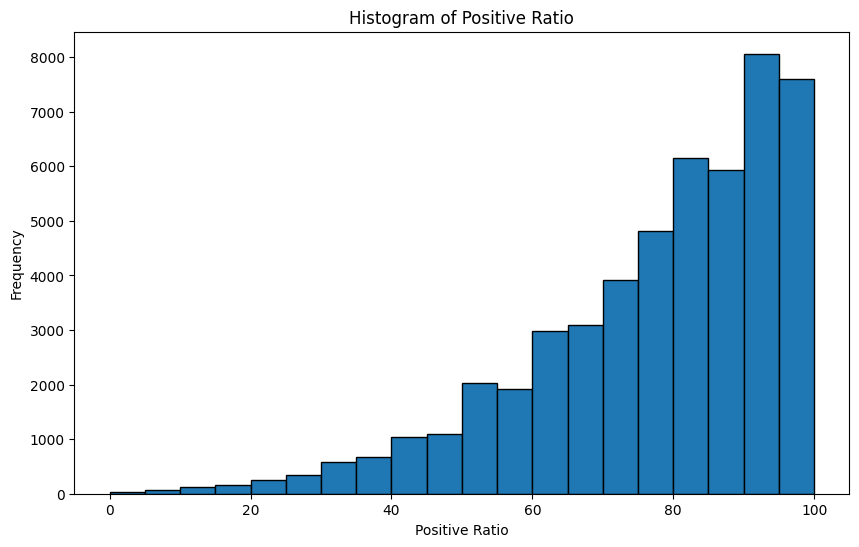

In [ ]:
plt.figure(figsize=(10, 6))  # Sets the figure size
plt.hist(games_df['positive_ratio'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Positive Ratio')
plt.xlabel('Positive Ratio')
plt.ylabel('Frequency')
plt.show()

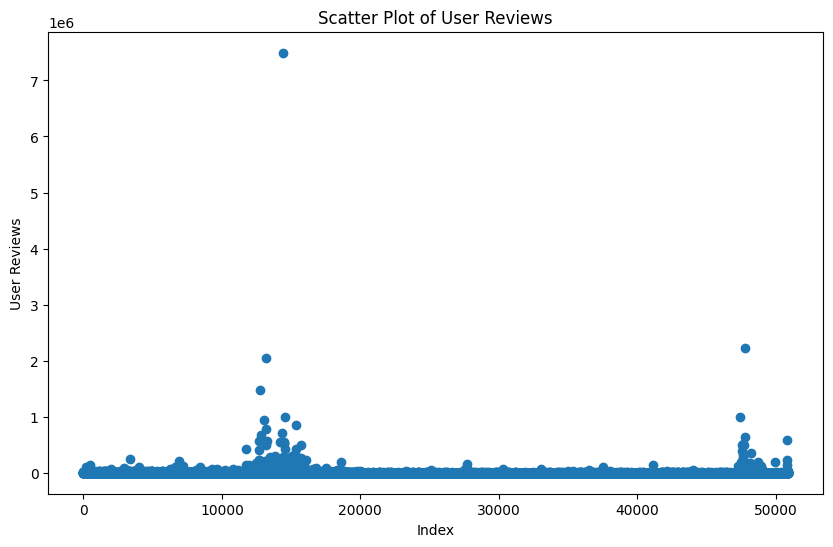

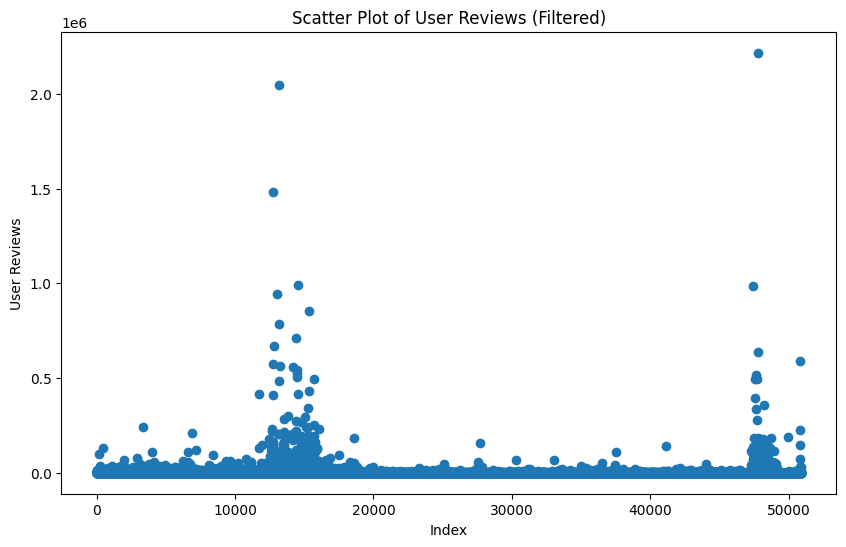

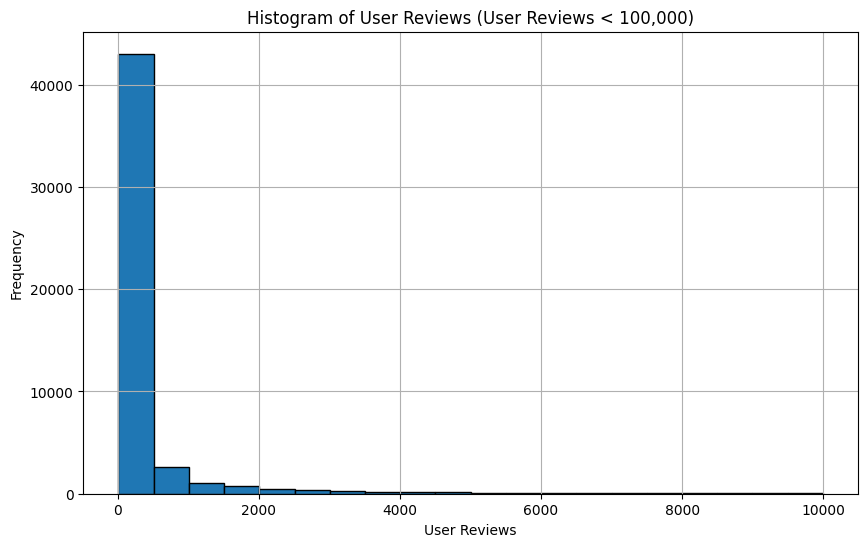

In [ ]:
# Check user reviews
plt.figure(figsize=(10, 6))  # Sets the figure size
plt.scatter(games_df.index, games_df['user_reviews'])
plt.title('Scatter Plot of User Reviews')
plt.xlabel('Index')
plt.ylabel('User Reviews')
plt.show()

# Remove rows where 'user_reviews' > 7000000
games_df_filtered = games_df[games_df['user_reviews'] <= 7000000]

# Plot the scatter graph again with the filtered DataFrame
plt.figure(figsize=(10, 6))  # Sets the figure size
plt.scatter(games_df_filtered.index, games_df_filtered['user_reviews'])
plt.title('Scatter Plot of User Reviews (Filtered)')
plt.xlabel('Index')
plt.ylabel('User Reviews')
plt.show()

# Filter the DataFrame where 'user_reviews' < 10000
filtered_user_reviews = games_df[games_df['user_reviews'] < 10000]

plt.figure(figsize=(10, 6))  # Sets the figure size
plt.hist(filtered_user_reviews['user_reviews'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of User Reviews (User Reviews < 100,000)')
plt.xlabel('User Reviews')
plt.ylabel('Frequency')
plt.grid(True)  # Optional: Adds a grid
plt.show()

# Data Cleaning

In [ ]:
# Remove rows where price_final > price_original
games_df= games_df[~(games_df['price_final'] > games_df['price_original'])]
games_df.reset_index(drop=True, inplace=True)

In [ ]:
# Remove Steam Deck column
games_df.drop('steam_deck', axis=1, inplace=True)

<ipython-input-10-49eff2844381>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.drop('steam_deck', axis=1, inplace=True)


# Data Transformation

## Creating dummy variables for all unique tags

In [ ]:
import pandas as pd
import json

# Read the JSON file to extract unique tags
unique_tags = set()
with open('games_metadata.json', 'r') as file:
    data = file.readlines()
    for line in data:
        game_data = json.loads(line)
        unique_tags.update(game_data.get('tags', []))

# Read the games.csv file
games_df = pd.read_csv('games.csv')

# Create a DataFrame to store tag columns
tag_columns = pd.DataFrame(0, index=games_df.index, columns=list(unique_tags))

# Update tag columns with 1 if the tag is present for the game (One hot encoding)
with open('games_metadata.json', 'r') as file:
    data = file.readlines()
    for line in data:
        game_data = json.loads(line)
        app_id = game_data['app_id']
        tags = game_data.get('tags', [])
        for tag in tags:
            tag_columns.loc[games_df['app_id'] == app_id, tag] = 1

# Concatenate the tag columns with the original DataFrame
games_df = pd.concat([games_df, tag_columns], axis=1)

## One hot encoding for games platform

In [ ]:
# Convert 'True' to 1 and 'False' to 0 in 'WIN', 'MAC', and 'LINUX' columns
games_df['win'] = games_df['win'].astype(int)
games_df['mac'] = games_df['mac'].astype(int)
games_df['linux'] = games_df['linux'].astype(int)

# Save the modified dataframe to the same CSV file
#games_df.to_csv('games_with_tags.csv', index=False)

## Ordinal encoding for ratings

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define the desired order of categories (reversed)
rating_order = [
    'Overwhelmingly Negative', 'Very Negative', 'Negative',  'Mostly Negative', 'Mixed', 'Mostly Positive',
    'Positive', 'Very Positive', 'Overwhelmingly Positive'
]

# Create an instance of OrdinalEncoder with the reversed order
encoder = OrdinalEncoder(categories=[rating_order])

# Fit and transform the 'rating' column using the encoder
games_df['rating_encoded'] = encoder.fit_transform(games_df[['rating']])

# Display the encoded values
print(games_df[['rating', 'rating_encoded']])
print(games_df['rating_encoded'].unique())


                rating  rating_encoded
0        Very Positive             7.0
1             Positive             6.0
2        Very Positive             7.0
3                Mixed             4.0
4        Very Positive             7.0
...                ...             ...
50867    Very Positive             7.0
50868  Mostly Negative             3.0
50869    Very Positive             7.0
50870    Very Positive             7.0
50871    Very Positive             7.0

[50872 rows x 2 columns]
[7. 6. 4. 5. 8. 2. 3. 0. 1.]


## Log Transform positive_ratio, user_reviews, price_final, price_original

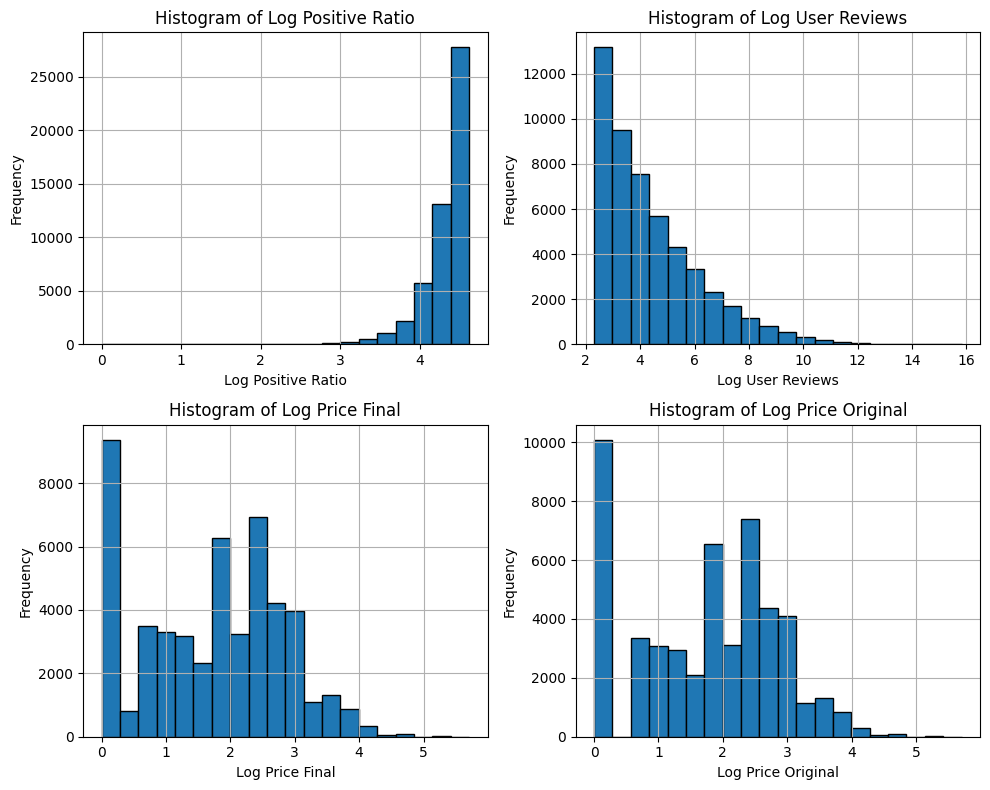

In [ ]:
import numpy as np

# Log transform the columns, handling zero values
games_df['positive_ratio_log'] = np.log(games_df['positive_ratio'] + 1)  # Adding 1 to avoid log(0)
games_df['user_reviews_log'] = np.log(games_df['user_reviews'])
games_df['price_final_log'] = np.log(games_df['price_final'] + 1)  # Adding 1 to avoid log(0)
games_df['price_original_log'] = np.log(games_df['price_original'] + 1)  # Adding 1 to avoid log(0)

# Plot histograms of the log-transformed columns
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.hist(games_df['positive_ratio_log'], bins=20, edgecolor='black')
plt.title('Histogram of Log Positive Ratio')
plt.xlabel('Log Positive Ratio')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(games_df['user_reviews_log'], bins=20, edgecolor='black')
plt.title('Histogram of Log User Reviews')
plt.xlabel('Log User Reviews')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(games_df['price_final_log'], bins=20, edgecolor='black')
plt.title('Histogram of Log Price Final')
plt.xlabel('Log Price Final')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(games_df['price_original_log'], bins=20, edgecolor='black')
plt.title('Histogram of Log Price Original')
plt.xlabel('Log Price Original')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()




In [ ]:
# Drop the specified columns
games_df.drop(columns=['rating', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'steam_deck'], inplace=True)

# Display the updated DataFrame
print(games_df)

        app_id                                      title date_release  win  \
0        13500          Prince of Persia: Warrior Within™   2008-11-21    1   
1        22364                    BRINK: Agents of Change   2011-08-03    1   
2       113020               Monaco: What's Yours Is Mine   2013-04-24    1   
3       226560                         Escape Dead Island   2014-11-18    1   
4       249050                    Dungeon of the ENDLESS™   2014-10-27    1   
...        ...                                        ...          ...  ...   
50867  2296380  I Expect You To Die 3: Cog in the Machine   2023-09-28    1   
50868  1272080                                   PAYDAY 3   2023-09-21    1   
50869  1402110                                 Eternights   2023-09-11    1   
50870  2272250                        Forgive Me Father 2   2023-10-19    1   
50871  2488510                                  FatalZone   2023-10-23    1   

       mac  linux  discount  Resource Management  S

In [ ]:
# Define the list of columns to be moved
columns_to_move = ['rating_encoded', 'positive_ratio_log', 'user_reviews_log', 'price_final_log', 'price_original_log']

# Move the specified columns to the front, after the 6th column
new_order = (list(games_df.columns[:6]) +
             columns_to_move +
             [col for col in games_df.columns if col not in columns_to_move and col not in games_df.columns[:6]])

# Reorder the DataFrame columns
games_df = games_df[new_order]

# Display the updated DataFrame
print(games_df)
# Save the modified dataframe to the same CSV file
games_df.to_csv('games_cleaned.csv', index=False)

        app_id                                      title date_release  win  \
0        13500          Prince of Persia: Warrior Within™   2008-11-21    1   
1        22364                    BRINK: Agents of Change   2011-08-03    1   
2       113020               Monaco: What's Yours Is Mine   2013-04-24    1   
3       226560                         Escape Dead Island   2014-11-18    1   
4       249050                    Dungeon of the ENDLESS™   2014-10-27    1   
...        ...                                        ...          ...  ...   
50867  2296380  I Expect You To Die 3: Cog in the Machine   2023-09-28    1   
50868  1272080                                   PAYDAY 3   2023-09-21    1   
50869  1402110                                 Eternights   2023-09-11    1   
50870  2272250                        Forgive Me Father 2   2023-10-19    1   
50871  2488510                                  FatalZone   2023-10-23    1   

       mac  linux  rating_encoded  positive_ratio_l

# Feature Engineering



## Principle Component Analysis

In [ ]:
# Load your dataset
games_cleaned_df = pd.read_csv('games_cleaned.csv')

# Define numerical columns
numerical_columns = [
    'rating_encoded', 'positive_ratio_log', 'user_reviews_log',
    'price_final_log', 'price_original_log', 'discount'
]

# Ddefine categorical columns by excluding specified columns
excluded_columns = numerical_columns + ['app_id', 'title', 'date_release']
categorical_columns = [col for col in games_cleaned_df.columns if col not in excluded_columns]

# Printing the lists (optional)
print(f"Numerical Columns: {numerical_columns}")
print(f"Categorical Columns: {len(categorical_columns)} columns")  # To avoid cluttering the output


Numerical Columns: ['rating_encoded', 'positive_ratio_log', 'user_reviews_log', 'price_final_log', 'price_original_log', 'discount']
Categorical Columns: 444 columns


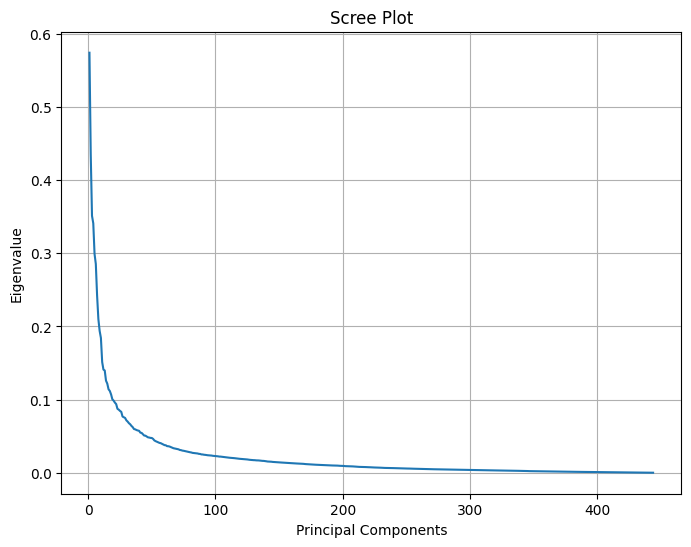

In [ ]:
from sklearn.decomposition import PCA
# Perform PCA directly (no encoding needed)
pca = PCA()
pca.fit(games_cleaned_df[categorical_columns])

# Explained variance for selecting n_components
explained_variance = pca.explained_variance_ratio_
cum_variance = np.cumsum(explained_variance)

# Example: Select n_components for 80% explained variance
n_components = np.argmax(cum_variance >= 0.80) + 1

# Create scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(games_cleaned_df[categorical_columns])

column_names = [f'PC{i + 1}' for i in range(n_components)]  # Generate names from 'PC1' to 'PCn_components'
pca_df = pd.DataFrame(pca_result, columns=column_names)

# Select unused columns from the original DataFrame
unused_columns = games_cleaned_df.drop(categorical_columns, axis=1)

# Concatenate the results
final_df = pd.concat([unused_columns, pca_df], axis=1)

final_df.to_csv('games_cleaned_PCA.csv', index=False)